In [7]:
import pandas as pd
import psycopg2 as pg2
from psycopg2.extensions import ISOLATION_LEVEL_AUTOCOMMIT
import numpy as np
import sys
import matplotlib.pyplot as plt

plat = 'facebook'
arch = 'snap_%s'%plat

database = 'arch-snap_%s-scale-1'%plat
conn = pg2.connect("host='localhost'  port=5422 user='duke' password='duke' dbname=%s"%database)
conn.set_isolation_level(ISOLATION_LEVEL_AUTOCOMMIT)
cursor = conn.cursor()

In [26]:
source = '348'
circles = ['dabfae', '4d72cf', 'cd20fc', '9939a6']

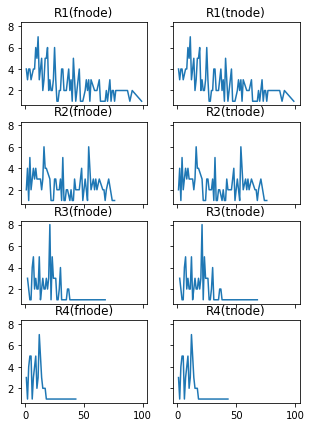

In [34]:
fig, axes = plt.subplots(4, 2, sharex=True, sharey=True, figsize=(5,7))

for i, circle in enumerate(circles):
    table = 'source_%s_circle_%s'%(source, circle)
    for j, attr in enumerate(['fnode', 'tnode']):
        sql = 'select cnt, count(*) as freq FROM (select count(*) cnt from %s group by %s) as T GROUP BY cnt ORDER BY cnt'%(table, attr)
        df = pd.read_sql(sql, conn)
        x = df['cnt'].to_list()
        y = df['freq'].to_list()
        axes[i, j].plot(x,y)
        axes[i, j].set_title('%s(%s)'%('R%d'%(i+1), attr)) 
fig.savefig('result/facebook_distribution.pdf', format='pdf')

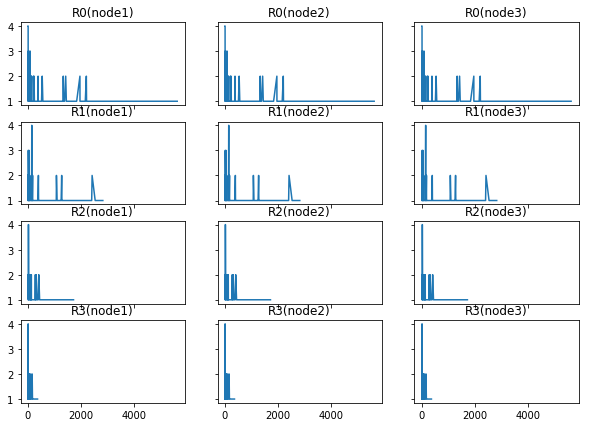

In [33]:
fig, axes = plt.subplots(4, 3, sharex=True, sharey=True, figsize=(10,7))

for i, circle in enumerate(circles):
    table = 'tri_source_%s_circle_%s'%(source, circle)
    for j, attr in enumerate(['node1', 'node2', 'node3']):
        sql = 'select cnt, count(*) as freq FROM (select count(*) cnt from %s group by %s) as T GROUP BY cnt ORDER BY cnt'%(table, attr)
        df = pd.read_sql(sql, conn)
        x = df['cnt'].to_list()
        y = df['freq'].to_list()
        axes[i, j].plot(x,y)
        axes[i, j].set_title('%s(%s)'%('R%d'%i, attr))   

In [ ]:
def count_on_count()